# 8章 相関

ピアソンの積率相関係数$r$

$$
    r = 
    \frac{SP_{XY}}{\sqrt{SS_{X} SS_{Y}}} = 
    \frac{\sum\limits^n_{i=1}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum\limits^n_{i=1}(X_i - \bar{X})^2 \sum\limits^n_{i=1}(Y_i - \bar{Y})^2}} 
$$

In [1]:
r <- 0.5
x <- rnorm(1000, mean=0, sd=5)
y <- r*x + sqrt(1 - r**2) * rnorm(1000, mean=0, sd=5)
cor(x, y)

[1] 0.5284013

In [3]:
options(repr.plot.width=4, repr.plot.height=4)

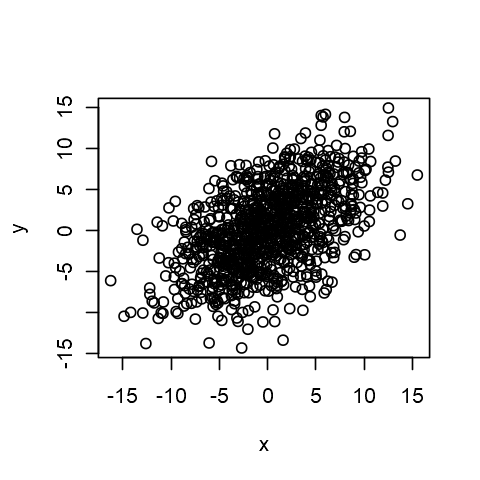

In [4]:
plot(x, y)

相関係数の検定: $t$検定

$$ t = \frac{r}{\frac{1-r^2}{n-2}} $$

In [5]:
d <- data.frame(
    X = c(11.7, 11.9, 10.1, 13.6, 12.8, 10.5, 9.8, 10.9, 11.6, 11.8, 13.1, 12.4, 12.2), 
    Y = c(8.2, 8.2, 7.1, 9.2, 8.7, 7.7, 6.5, 7.7, 7.8, 8.0, 9.3, 8.6, 8.3)
)
d

X,Y
11.7,8.2
11.9,8.2
10.1,7.1
13.6,9.2
12.8,8.7
10.5,7.7
9.8,6.5
10.9,7.7
11.6,7.8
11.8,8.0


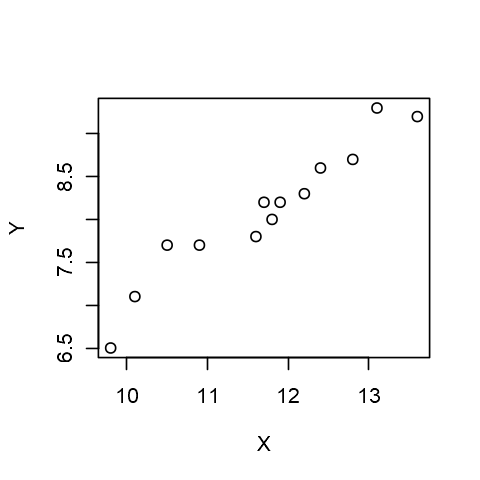

In [9]:
with(data=d, plot(X, Y))

In [12]:
with(data=d, cor.test(x = X, y = Y))


	Pearson's product-moment correlation

data:  X and Y
t = 12.015, df = 11, p-value = 1.149e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8807398 0.9894269
sample estimates:
      cor 
0.9639463 


In [13]:
d2 <- data.frame(
    X = c(12.5, 13.1, 18.9, 9.7, 16.4, 8.3, 13.7, 17.5, 11.4, 16.2, 19.3, 15.3), 
    Y = c(10.5, 8.9, 13.6, 6.3, 12.5, 10.3, 10.8, 16.7, 8.3, 9.5, 12.4, 10.1)
)
d2

X,Y
12.5,10.5
13.1,8.9
18.9,13.6
9.7,6.3
16.4,12.5
8.3,10.3
13.7,10.8
17.5,16.7
11.4,8.3
16.2,9.5


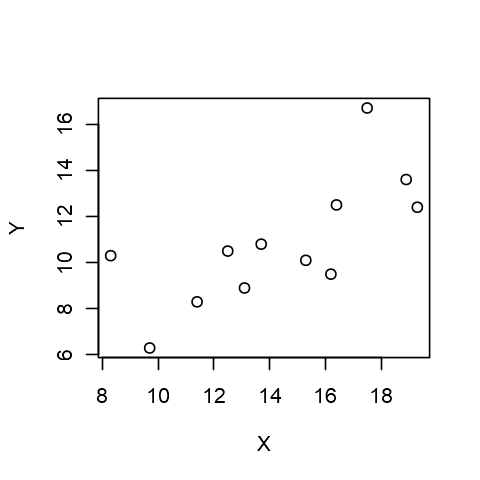

In [15]:
with(plot(X, Y), data=d2)

## 演習問題

In [16]:
with(cor.test(X, Y), data=d2)


	Pearson's product-moment correlation

data:  X and Y
t = 3.1475, df = 10, p-value = 0.01038
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2210441 0.9106632
sample estimates:
      cor 
0.7054536 


In [17]:
my_cor_test <- function(x, y){
    n <- length(x)
    r <- cor(x, y)
    t <- r / (sqrt((1 - r**2) / (n - 2)))
    return(t)
}
with(my_cor_test(X, Y), data=d2)

[1] 3.147542

In [19]:
nrow(d2)

[1] 12

In [20]:
qt(0.05, df=10)

[1] -1.812461

In [21]:
qt(0.95, df=10)

[1] 1.812461

In [26]:
2 * (1 - pt(q=3.1475, df=10))

[1] 0.01037698

In [27]:
my_cor <- function(x, y){
    sp.xy <- sum((x - mean(x)) * (y - mean(y)))
    sp.x <- sum((x - mean(x))**2)
    sp.y <- sum((y - mean(y))**2)
    return(sp.xy / sqrt(sp.x * sp.y))
}
with(my_cor(X, Y), data=d2)

[1] 0.7054536

In [31]:
my_cor_test <- function(x, y){
    n <- length(x)
    r <- my_cor(x, y)
    cat("r = ", r, "\n")
    t <- r / (sqrt((1 - r**2) / (n - 2)))
    cat("t = ", t, "\n")
    p_val <- 2 * (1 - pt(q=t, df=n - 2))
    cat("p = ", p_val, "\n")
    
}
with(my_cor_test(X, Y), data=d2)

r =  0.7054536 
t =  3.147542 
p =  0.01037623 


In [32]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en_US.UTF-8                 
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2017-06-21                  

 package   * version    date       source                            
 Cairo       1.5-9      2015-09-26 CRAN (R 3.2.2)                    
 crayon      1.3.2      2016-06-28 CRAN (R 3.3.1)                    
 devtools    1.12.0     2016-06-24 CRAN (R 3.3.1)                    
 digest      0.6.12     2017-01-27 CRAN (R 3.3.3)                    
 evaluate    0.10       2016-10-11 CRAN (R 3.3.2)                    
 IRdisplay   0.4.4      2016-08-02 CRAN (R 3.3.1)                    
 IRkernel    0.8.6.9000 2017-04-13 Github (IRkernel/IRkernel@29ae7df)
 jsonlite    1.4        2017-04-08 CRAN (R 3.3.3)                    
 magrittr    1.5        2014-11-22 CRAN (R 3.2.1)        